In [6]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt

In [7]:
val = []
for n in np.linspace(0, 1/3 , 1000):
    val.append(realign_log(rhob(n,generate_bell_states())))

print(val)

[6.406853007629834e-16, 0.0006302216760494471, 0.0012602487713945063, 0.0018900817852455251, 0.0025197212182144517, 0.0031491675723248885, 0.003778421351029788, 0.004407483059218882, 0.005036353203236937, 0.005665032290892715, 0.006293520831475874, 0.006921819335768406, 0.007549928316057959, 0.008177848286153663, 0.008805579761396497, 0.009433123258677286, 0.01006047929644762, 0.010687648394734895, 0.011314631075157629, 0.011941427860938506, 0.012568039276919924, 0.013194465849577605, 0.013820708107036376, 0.01444676657908464, 0.01507264179718945, 0.015698334294510896, 0.016323844605919943, 0.016949173268010844, 0.01757432081911823, 0.018199287799332, 0.018824074750516222, 0.01944868221631916, 0.020073110742195272, 0.020697360875418323, 0.021321433165097884, 0.021945328162199008, 0.022569046419552957, 0.023192588491881504, 0.023815954935806648, 0.024439146309871946, 0.0250621631745613, 0.02568500609231043, 0.02630767562753183, 0.026930172346624925, 0.027552496818002786, 0.0281746496121

In [8]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]

In [9]:
xi = 0.8
Dmat1 = D(e,xi,momentum1)
Dmat2 = D(e,xi,momentum2)
Dmat = [None, Dmat1, Dmat2]

#add a sum function before applying realign_log

val_08=[]
val_08_corr = []

for n in np.linspace(0, 1/3 , 1000):

        sum = np.zeros_like(rhob(n,generate_bell_states()),dtype=complex)

        for i,j in [(1,2),(2,1)]:

                sum += (1/np.sqrt(2)) * np.matmul(
                        np.kron(Dmat[i].T,Dmat[j].T),np.matmul(rhob(n,generate_bell_states()),np.kron(Dmat[i].conj().T,Dmat[j].conj().T))
                        )
        
        val_08.append(realign_log(sum))
        val_08_corr.append(realign_log(sum)-0.5)


In [10]:
xi = 1
Dmat1 = D(e,xi,momentum1)
Dmat2 = D(e,xi,momentum2)
Dmat = [None, Dmat1, Dmat2]

#add a sum function before applying realign_log

val_1=[]
val_1_corr = []

for n in np.linspace(0, 1/3 , 1000):

        sum = np.zeros_like(rhob(n,generate_bell_states()),dtype=complex)

        for i,j in [(1,2),(2,1)]:

                sum += (1/np.sqrt(2)) * np.matmul(
                        np.kron(Dmat[i].T,Dmat[j].T),np.matmul(rhob(n,generate_bell_states()),np.kron(Dmat[i].conj().T,Dmat[j].conj().T))
                        )
        
        val_1.append(realign_log(sum))
        val_1_corr.append(realign_log(sum)-0.5)


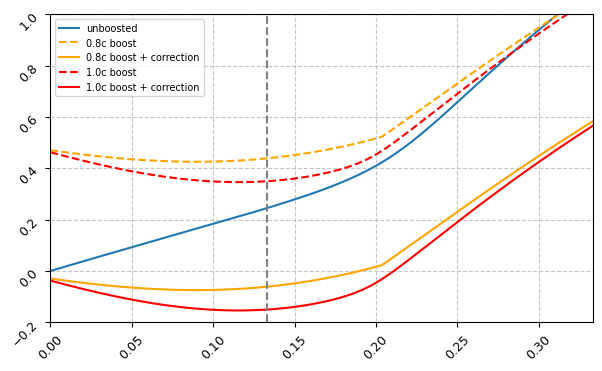

In [12]:
plt.figure(figsize=(7, 4))
plt.xlim(0,1/3)
plt.ylim(-0.2)
plt.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
plt.plot(np.linspace(0,1/3,1000), val_08, linestyle = "--", color = "orange", label = "0.8c boost")
plt.plot(np.linspace(0,1/3,1000), val_08_corr, color = "orange", label="0.8c boost + correction")
plt.plot(np.linspace(0,1/3,1000), val_1, linestyle = "--", color = "red", label="1.0c boost")
plt.plot(np.linspace(0,1/3,1000), val_1_corr, color = "red",label="1.0c boost + correction")
plt.axvline(2/15, linestyle = "--", color = "grey")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=9, rotation=45)
plt.yticks(fontsize=9, rotation=45)
plt.legend(fontsize=7)
plt.show()